# Kata Kunci Berita


Mencari dokumen melalui kata kunci dapat mempermudah kita dalam mencari suatu dokumen yang relevan. Kata Kunci merupakan kata yang penting dan sering muncul dalam sebuah teks maupun dokumen. Biasanya kata kunci mengandung kata yang unik, dan bermakna spesifik.


## Proses Pembersihan Teks


### Import Library


In [164]:
# Library untuk text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Library untuk data manipulation
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Library untuk text similarity
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [165]:
data = pd.read_csv('../tugas1/data_100.csv')
data

,judul,tanggal,isi,kategori
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional
...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional


### Preprocessing Text


In [166]:
def clean_text(text):
	text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Menghapus https* and www*
	text = re.sub(r'@[^\s]+', ' ', text) # Menghapus username
	text = re.sub(r'[\s]+', ' ', text) # Menghapus tambahan spasi
	text = re.sub(r'#([^\s]+)', ' ', text) # Menghapus hashtags
	text = re.sub(r"[^a-zA-Z : .]", "", text) # Menghapus tanda baca
	text = re.sub(r'\d', ' ', text) # Menghapus angka
	text = text.lower()
	text = text.encode('ascii','ignore').decode('utf-8') #Menghapus ASCII dan unicode
	text = re.sub(r'[^\x00-\x7f]',r'', text)
	text = text.replace('\n','') #Menghapus baris baru
	text = text.strip()
	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

Membersihkan text dari tanda baca yang ada, kemudian menyesuaikan text agar bisa diolah lebih lanjut.


In [167]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

data['cleaned_news'] = preprocess_text(data['isi'])
data

100%|██████████| 100/100 [00:00<00:00, 377.48it/s]


,judul,tanggal,isi,kategori,cleaned_news
0,FOTO: Melihat Kehancuran Gaza usai Satu Tahun ...,"Senin, 07 Okt 2024 10:30 WIB",Satu tahun agresi Israel ke Gaza yang dimulai ...,internasional,agresi israel gaza oktober warga palestina ter...
1,"VIDEO: Setahun Agresi Israel ke Gaza, Korban T...","Senin, 07 Okt 2024 10:03 WIB",Agresi Israel ke Jalur Gaza telah memasuki sat...,internasional,agresi israel jalur gaza memasuki senin . rent...
2,Jenderal Brigade Al-Quds Iran Hilang usai Isra...,"Senin, 07 Okt 2024 09:59 WIB","Kepala pasukan Brigade Al-Quds Iran, Esmail Qa...",internasional,kepala pasukan brigade alquds iran esmail qaan...
3,VIDEO: Kelompok Militan Pakistan Serang Karach...,"Senin, 07 Okt 2024 09:28 WIB",Sebuah ledakan terjadi di dekat bandara intern...,internasional,ledakan bandara internasional karachi pakistan...
4,"Setahun Agresi Gaza, Israel Was-was Antisipasi...","Senin, 07 Okt 2024 09:25 WIB",Pasukan Pertahanan Israel (IDF) bersiaga ketat...,internasional,pasukan pertahanan israel idf bersiaga ketat p...
...,...,...,...,...,...
95,VIDEO: Momen Perang Yel-yel Warnai Debat Perda...,"Minggu, 06 Okt 2024 20:42 WIB",Perang yel-yel dari tiga pendukung calon guber...,nasional,perang yelyel pendukung calon gubernur dki jak...
96,Dharma Sindir Gagasan RK-Pramono soal Kemaceta...,"Minggu, 06 Okt 2024 20:34 WIB","Calon gubernur jalur independen, Dharma Pongre...",nasional,calon gubernur jalur independen dharma pongrek...
97,Pramono Janji Buat Jaringan Transjakarta hingg...,"Minggu, 06 Okt 2024 20:31 WIB",Calon gubernur Jakarta Pramono Anung berjanji ...,nasional,calon gubernur jakarta pramono anung berjanji ...
98,Jurus RK Atasi Macet: Bikin Angkutan Sungai Hi...,"Minggu, 06 Okt 2024 20:29 WIB",Calon Gubernur Jakarta Ridwan Kamil mengungkap...,nasional,calon gubernur jakarta ridwan kamil mengungkap...


### Memisahkan Kalimat menjadi per Kata


In [168]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace('.', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

In [169]:
kalimat

['pasukan pertahanan israel idf bersiaga ketat perbatasan menjelang agresi jalur gaza palestina minggu ',
 'idf bersiaga mengantisipasi serangan kelompok milisi hamas palestina senin peringatan konflik oktober ',
 'the times of israel melaporkan idf memperkuat pasukan perbatasan mengantisipasi serangan roket jarak ditembakkan gaza ',
 'sumber militer percaya hamas serangan roket operasinya ditumpas israel ',
 'komando selatan pertahanan serangan skenario bulanbulan bersamaan acara peringatan dilaksanakan aman pernyataan idf ',
 'militer hamas menembakkan roket gaza perbatasan israel ',
 'militer memperkuat pertahanan perbatasan gaza koridor netzarim lokasi pendudukan idf ',
 'kompi dilaporkan dikerahkan menjaga kotakota perbatasan zionis ',
 'kewaspadaan ',
 'tingkat kesiapan tindakan ofensif kepala komando selatan yaron finkelman ',
 'sabtu malam juru bicara idf daniel hagari mewantiwanti warga sipil berhatihati ',
 'meningkatkan pasukan mengantisipasi ',
 'agresi israel gaza senin me

In [170]:
kata

['pasukan',
 'skenario',
 'memperkuat',
 'kotakota',
 'selatan',
 'israel',
 'hamas',
 'oktober',
 'dilaporkan',
 'kompi',
 'hagari',
 'bersamaan',
 'meninggal',
 'disandera',
 'senin',
 'melaporkan',
 'pemerintah',
 'tel',
 'aman',
 'minggu',
 'upacara',
 'menggelar',
 'ditumpas',
 'dilaksanakan',
 'melukai',
 'tewas',
 'taman',
 'menyepakati',
 'agresi',
 'kesiapan',
 'menewaskan',
 'menembakkan',
 'mewantiwanti',
 'kunjung',
 'percaya',
 'sumber',
 'catatan',
 'bicara',
 'digelar',
 'aviv',
 'sandera',
 'menjaga',
 'jalur',
 'militer',
 'times',
 'meningkatkan',
 'roket',
 'netzarim',
 'sipil',
 'dikabarkan',
 'senjata',
 'keluarga',
 'gaza',
 'bersiaga',
 'bulanbulan',
 'pendudukan',
 'serangan',
 'terbatas',
 'tindakan',
 'penyanderaan',
 'kepala',
 'yarkon',
 'perbatasan',
 'milisi',
 'berkumpul',
 'konflik',
 'sabtu',
 'yaron',
 'orang',
 'daniel',
 'gencatan',
 'pasca',
 'kelompok',
 'idf',
 'malam',
 'menjelang',
 'mengantisipasi',
 'acara',
 'komando',
 'ofensif',
 'ditembakk

## Membuat Matriks


### Occurrence matrix


Menghitung frekuensi kemunculan kata dalam kumpulan teks.


In [171]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)
	
	for i, sent in enumerate(data):
		# Tokenisasi kalimat menjadi kata-kata
		kata_kalimat = word_tokenize(sent)
		
		# Hitung frekuensi setiap kata dalam kalimat
		for word in kata_kalimat:
			if word in kata:
				vektor_kata.at[i, word] += 1

	return vektor_kata

In [172]:
df_vektor_kata = vektor_kata(kalimat)
df_vektor_kata

,pasukan,skenario,memperkuat,kotakota,selatan,israel,hamas,oktober,dilaporkan,kompi,...,peringatan,dikerahkan,the,tingkat,memasuki,jarak,pertahanan,koridor,berhatihati,diyakini
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Hasil Kata Kunci


In [173]:
sorted_kata = df_vektor_kata.sum().sort_values(ascending=False)[:3]
print(", ".join(sorted_kata.index))

israel, hamas, gaza


### Co-occurrence Matrix


Co-occurrence adalah konsep dalam analisis teks yang mengukur seberapa sering dua kata atau lebih muncul bersama-sama dalam suatu konteks tertentu, seperti dalam kalimat, paragraf, atau dokumen.


In [174]:
def create_cooccurrence_matrix(data):
	vektor_kata = pd.DataFrame(0, index=kata, columns=kata)

	for sent in data:
		kata_kalimat = word_tokenize(sent)
		for i in range(len(kata_kalimat)-1):
			vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1
			vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1
	
	return vektor_kata

cooccurrence_matrix = create_cooccurrence_matrix(kalimat)
cooccurrence_matrix

,pasukan,skenario,memperkuat,kotakota,selatan,israel,hamas,oktober,dilaporkan,kompi,...,peringatan,dikerahkan,the,tingkat,memasuki,jarak,pertahanan,koridor,berhatihati,diyakini
pasukan,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
skenario,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
memperkuat,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
kotakota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
selatan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jarak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pertahanan,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
koridor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
berhatihati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cosine Similarity


In [175]:
cossim = cosine_similarity(cooccurrence_matrix)

#### Graph


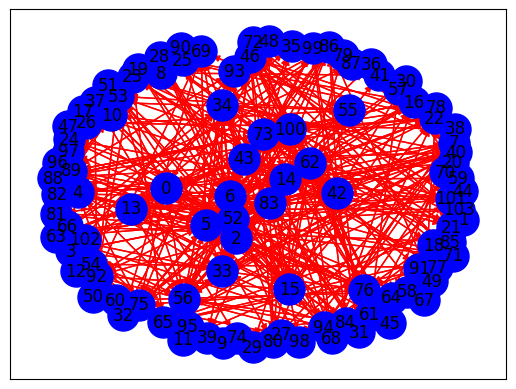

In [176]:
G = nx.DiGraph()
for i in range(len(cossim)):
    G.add_node(i)

for i in range(len(cossim)):
    for j in range(len(cossim)):
        similarity = cossim[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G, k=2)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [177]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 5: 0.0404
Node 52: 0.0321
Node 6: 0.0303
Node 100: 0.0285
Node 62: 0.0258
Node 83: 0.0244
Node 14: 0.0242
Node 56: 0.0216
Node 73: 0.0199
Node 42: 0.0189
Node 2: 0.0183
Node 15: 0.0180
Node 76: 0.0179
Node 0: 0.0159
Node 43: 0.0150
Node 46: 0.0147
Node 68: 0.0142
Node 34: 0.0142
Node 31: 0.0142
Node 13: 0.0137
Node 94: 0.0136
Node 33: 0.0131
Node 88: 0.0131
Node 86: 0.0126
Node 7: 0.0121
Node 22: 0.0119
Node 3: 0.0113
Node 65: 0.0112
Node 40: 0.0111
Node 63: 0.0111
Node 20: 0.0111
Node 4: 0.0111
Node 16: 0.0110
Node 28: 0.0110
Node 53: 0.0110
Node 75: 0.0110
Node 82: 0.0106
Node 71: 0.0104
Node 37: 0.0103
Node 101: 0.0102
Node 89: 0.0100
Node 55: 0.0097
Node 69: 0.0096
Node 21: 0.0096
Node 77: 0.0096
Node 92: 0.0094
Node 23: 0.0091
Node 93: 0.0089
Node 80: 0.0088
Node 1: 0.0088
Node 58: 0.0085
Node 59: 0.0081
Node 39: 0.0077
Node 64: 0.0076
Node 79: 0.0075
Node 78: 0.0075
Node 72: 0.0072
Node 98: 0.0068
Node 19: 0.0068
Node 24: 0.0068
Node 60: 0.0064
Node 38: 0.0062
No

#### Hasil Kata Kunci


In [178]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 5: Page Rank = 0.0404
Kalimat: israel
Node 52: Page Rank = 0.0321
Kalimat: gaza
Node 6: Page Rank = 0.0303
Kalimat: hamas
